# Creating Geometries, a main core of Geospatial data Science

A 'geometry' column in spatial data ia a main core of it's composition. Without a geometry column, we cannot title the data as spatial since we will not be able to visualize it on earth or even plot it to have a result.\

There are different python libraries to help for creating geometries, geopandas is the challegiest of them.

### Writing geometries with Geopandas

In [200]:
import geopandas, fiona, pandas as pd, matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [201]:
# Create an empty geopandas GeoDataFrame
new_data = geopandas.GeoDataFrame()

In [202]:
new_data

""


In [203]:
type(new_data)

geopandas.geodataframe.GeoDataFrame

I will create a new dataframe of 'schools_in_kaolack' then extracte there coordinates to our new_data by creating a geometry column to it directly.

### Creating my data step by step from google earth

I want to google earth pro, searching 'schools in kaolack', there are appear many pages, to extract the data that appear on the first pages, you need to scroll down, you will see an icon similar to folder 'click here to save it to place', by clicking on that, just go to places, scroll down, you will see the title of your search, right click on it and rename it to 'your search 1', then go to second page in the researching result then do the same until the pages finish or just your needs. Return to the places and right click on the renamed pages, save them to kml. Go to the folder in your computer where you saved this searches results, right click on one of them, select property, change opening to '.txt' or just notepad, open excel file, import the searches results in txt format, modify it then you will have a similar to a correct data, remove unwanted columns, save it, use pandas to read them in python.

In [204]:
# Loading the data 'schools in kaolack' which i extracted from google earth and created an excel file
data = pd.read_excel('D:\Research\PROJECT\SENEGAL DATA ANALYSIS\data\some_school_in_kaolack.xlsx')

In [205]:
data.head()

,Name of Schools,Addresses,Coordinates,Contact Number
0,Cem Kabatoki,"Kaolack, Senegal","-16.143184,14.17126,0",NaN
1,Al-Azhar Institut Islamique,"Rue de Faidherbe, Kaolack, Senegal","-16.0756005,14.1333456,0",NaN
2,Wa.kuer Cheikh Ibraime Niass,"Unnamed Road, Senegal","-16.0708281,14.153684,0",+221 77 910 11 11
3,Cem Mbaba,"Unnamed Road, Senegal","-16.0624218,14.1536635,0",NaN
4,School De Koutal,"Kaolack, Senegal","-16.068386,14.085892,0",+221 77 659 42 96


In [206]:
data.columns

Index(['Name of Schools', 'Addresses', 'Coordinates', 'Contact Number'], dtype='object')

We are interested in the column named 'Coordinates', let's check if there is no missing values on it

In [207]:
data['Coordinates'].isnull().sum()

0

There is no missing data on Coordinates. The next step is to create 'Geometry' column, for that we need to extract latitude and longitude from data['Coordinates'].

The coordinate column contains normaly latitude and longitude x and y, but in our data the longitude is first and latitude is second, the ',0' must be removed from the data

In [208]:
# removing ',0' from coordinates to keep only the longitude started with (-) and latitude seperated by ','
data['Coordinates'] = data['Coordinates'].str.replace(',0', '')

In [209]:
data['Coordinates'].head()

0       -16.143184,14.17126
1    -16.0756005,14.1333456
2     -16.0708281,14.153684
3    -16.0624218,14.1536635
4      -16.068386,14.085892
Name: Coordinates, dtype: object

The data has been cleaned, next step is to create a lat and long column 


In [210]:
data[['longitude','latitude']] = data.Coordinates.str.split(',', expand=True) 

In [211]:
data.head()

,Name of Schools,Addresses,Coordinates,Contact Number,longitude,latitude
0,Cem Kabatoki,"Kaolack, Senegal","-16.143184,14.17126",NaN,-16.143184,14.17126
1,Al-Azhar Institut Islamique,"Rue de Faidherbe, Kaolack, Senegal","-16.0756005,14.1333456",NaN,-16.0756005,14.1333456
2,Wa.kuer Cheikh Ibraime Niass,"Unnamed Road, Senegal","-16.0708281,14.153684",+221 77 910 11 11,-16.0708281,14.153684
3,Cem Mbaba,"Unnamed Road, Senegal","-16.0624218,14.1536635",NaN,-16.0624218,14.1536635
4,School De Koutal,"Kaolack, Senegal","-16.068386,14.085892",+221 77 659 42 96,-16.068386,14.085892


In [212]:
# Check the changes in columns
data.columns.values

array(['Name of Schools', 'Addresses', 'Coordinates', 'Contact Number',
       'longitude', 'latitude'], dtype=object)

Now, we can create a geometry column

In [213]:
data['geometry'] = geopandas.points_from_xy(data.longitude, data.latitude)

In [214]:
data.head()

,Name of Schools,Addresses,Coordinates,Contact Number,longitude,latitude,geometry
0,Cem Kabatoki,"Kaolack, Senegal","-16.143184,14.17126",NaN,-16.143184,14.17126,POINT (-16.14318 14.17126)
1,Al-Azhar Institut Islamique,"Rue de Faidherbe, Kaolack, Senegal","-16.0756005,14.1333456",NaN,-16.0756005,14.1333456,POINT (-16.07560 14.13335)
2,Wa.kuer Cheikh Ibraime Niass,"Unnamed Road, Senegal","-16.0708281,14.153684",+221 77 910 11 11,-16.0708281,14.153684,POINT (-16.07083 14.15368)
3,Cem Mbaba,"Unnamed Road, Senegal","-16.0624218,14.1536635",NaN,-16.0624218,14.1536635,POINT (-16.06242 14.15366)
4,School De Koutal,"Kaolack, Senegal","-16.068386,14.085892",+221 77 659 42 96,-16.068386,14.085892,POINT (-16.06839 14.08589)


In [215]:
data.columns

Index(['Name of Schools', 'Addresses', 'Coordinates', 'Contact Number',
       'longitude', 'latitude', 'geometry'],
      dtype='object')

Now, we have a spatial data format

We still need to see the datatype of our data

In [216]:
data.dtypes

Name of Schools      object
Addresses            object
Coordinates          object
Contact Number       object
longitude            object
latitude             object
geometry           geometry
dtype: object

We need to change it to the corresponding format.


In [217]:
data = data.astype({"longitude": float, "latitude": float})


In [218]:
data.dtypes

Name of Schools      object
Addresses            object
Coordinates          object
Contact Number       object
longitude           float64
latitude            float64
geometry           geometry
dtype: object

We can try to plot our data and see the result

### Creating geometries with shapely library

We have Point in our result of geometry, let's create a point geometries for our coordinates

In [219]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
# Let's see what we have
len(geometry)

100

In [220]:
new_data = geopandas.GeoDataFrame()
# Create a new column called 'geometry' to the GeoDataFrame
new_data['geometry'] = geometry
new_geometry = geopandas.GeoDataFrame(new_data, geometry=geometry, crs = "EPSG:4626") # note that we here specify the CRS (projection) directly while reading to GDF


In [221]:
new_data

,geometry
0,POINT (-16.14318 14.17126)
1,POINT (-16.07560 14.13335)
2,POINT (-16.07083 14.15368)
3,POINT (-16.06242 14.15366)
4,POINT (-16.06839 14.08589)
...,...
95,POINT (-15.70535 14.38126)
96,POINT (-16.06820 14.14829)
97,POINT (-15.78012 14.37662)
98,POINT (-16.07992 14.14671)


<AxesSubplot:>

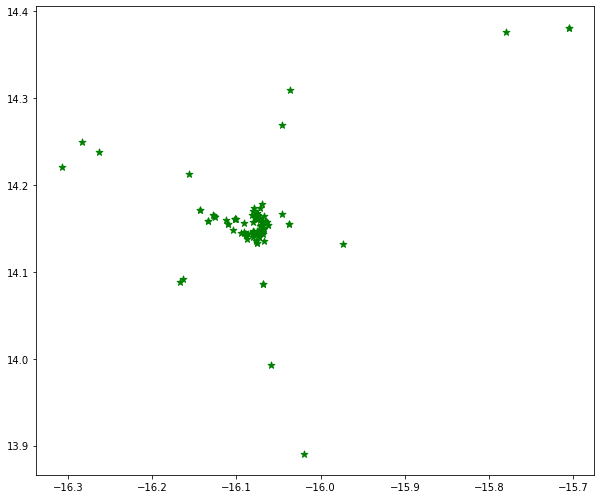

In [222]:
new_data.plot(figsize=(10,10), marker='*', color='green', markersize=50)

In [223]:
# Adding column to our data
new_data['addresses'] = [i for i in data['Addresses']]

In [224]:
new_data.head()

,geometry,addresses
0,POINT (-16.14318 14.17126),"Kaolack, Senegal"
1,POINT (-16.07560 14.13335),"Rue de Faidherbe, Kaolack, Senegal"
2,POINT (-16.07083 14.15368),"Unnamed Road, Senegal"
3,POINT (-16.06242 14.15366),"Unnamed Road, Senegal"
4,POINT (-16.06839 14.08589),"Kaolack, Senegal"


In [225]:
print(new_data.crs)

None


In [226]:
# Projecting our new_data to the right coordinate reference system, first let's just our data reference system
type(new_data)

geopandas.geodataframe.GeoDataFrame

In [227]:
from fiona.crs import from_epsg
new_data.crs = from_epsg(4326)

d:\programm files\python 3 8 6\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [228]:
new_data.crs

<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

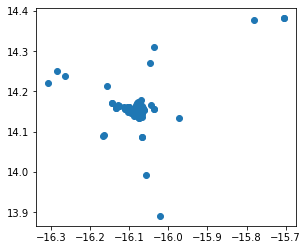

In [229]:
new_data.plot()

## Saving our files

In [230]:
# Saving the dataframe data file 
data.to_excel('D:\Research\PROJECT\SENEGAL DATA ANALYSIS\data\schools_in_kaolack.xlsx')


In [231]:
# Converting our data to a geodataframe and save it
gdf = geopandas.GeoDataFrame(data)
gdf.head()

,Name of Schools,Addresses,Coordinates,Contact Number,longitude,latitude,geometry
0,Cem Kabatoki,"Kaolack, Senegal","-16.143184,14.17126",NaN,-16.143184,14.171260,POINT (-16.14318 14.17126)
1,Al-Azhar Institut Islamique,"Rue de Faidherbe, Kaolack, Senegal","-16.0756005,14.1333456",NaN,-16.075601,14.133346,POINT (-16.07560 14.13335)
2,Wa.kuer Cheikh Ibraime Niass,"Unnamed Road, Senegal","-16.0708281,14.153684",+221 77 910 11 11,-16.070828,14.153684,POINT (-16.07083 14.15368)
3,Cem Mbaba,"Unnamed Road, Senegal","-16.0624218,14.1536635",NaN,-16.062422,14.153664,POINT (-16.06242 14.15366)
4,School De Koutal,"Kaolack, Senegal","-16.068386,14.085892",+221 77 659 42 96,-16.068386,14.085892,POINT (-16.06839 14.08589)


In [232]:
gdf.dtypes

Name of Schools      object
Addresses            object
Coordinates          object
Contact Number       object
longitude           float64
latitude            float64
geometry           geometry
dtype: object

In [233]:
print(gdf.crs)

None


In [234]:
gdf.crs = 'epsg:4326'
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [235]:
gdf.to_excel('D:\Research\PROJECT\SENEGAL DATA ANALYSIS\data\schools_in_kaolack_geodaframe.xlsx')

In [236]:
gdf.to_file('D:\Research\PROJECT\SENEGAL DATA ANALYSIS\data\schools_in_kaolack_data_shape')

The above code is saving the data as shapefile

In [237]:
# Saving the new_data
#new_data.to_file(new_data, 'D:\Research\PROJECT\SENEGAL DATA ANALYSIS\data\new_data_kaolack_schools_shapefile')